<a href="https://colab.research.google.com/github/Sievv/AMPs-Against-EC-/blob/main/EC_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Class distribution BEFORE SMOTE:
Activity
0    298
1     83
Name: count, dtype: int64


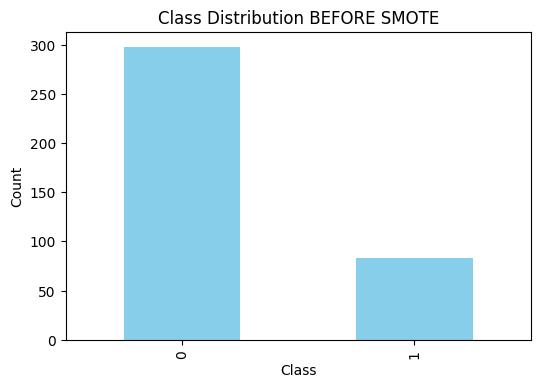


Class distribution AFTER SMOTE:
Activity
1    298
0    298
Name: count, dtype: int64


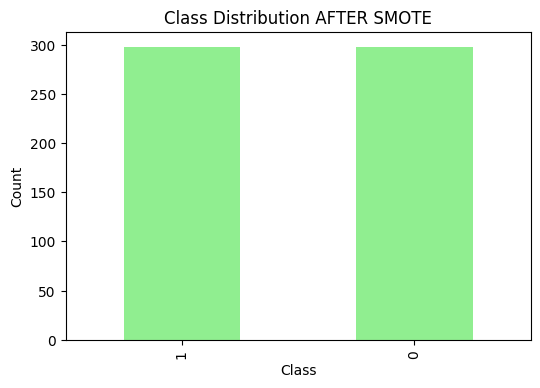


Resampled X_train saved to: /content/drive/MyDrive/EC/EC smote/X_train_resampled.csv
Resampled y_train saved to: /content/drive/MyDrive/EC/EC smote/y_train_resampled.csv

You can now use these resampled datasets to train your model with balanced classes.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load your original data
X_train = pd.read_csv('/content/drive/MyDrive/EC/EC smote/X_train_features.csv')
y_train = pd.read_csv('/content/drive/MyDrive/EC/EC smote/y_train.csv').squeeze()  # Ensure Series

# Drop 'Sequence' column if present
if 'Sequence' in X_train.columns:
    X_train = X_train.drop('Sequence', axis=1)
else:
    print("Warning: 'Sequence' column not found in X_train.")

# Print class distribution BEFORE SMOTE
print("Class distribution BEFORE SMOTE:")
print(y_train.value_counts())

# Plot before SMOTE
plt.figure(figsize=(6,4))
y_train.value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution BEFORE SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print class distribution AFTER SMOTE
print("\nClass distribution AFTER SMOTE:")
print(y_resampled.value_counts())

# Plot after SMOTE
plt.figure(figsize=(6,4))
y_resampled.value_counts().plot(kind='bar', color='lightgreen')
plt.title('Class Distribution AFTER SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Save resampled data to CSV
X_resampled_path = '/content/drive/MyDrive/EC/EC smote/X_train_resampled.csv'
y_resampled_path = '/content/drive/MyDrive/EC/EC smote/y_train_resampled.csv'

pd.DataFrame(X_resampled, columns=X_train.columns).to_csv(X_resampled_path, index=False)
y_resampled.to_csv(y_resampled_path, index=False)

print(f"\nResampled X_train saved to: {X_resampled_path}")
print(f"Resampled y_train saved to: {y_resampled_path}")

print("\nYou can now use these resampled datasets to train your model with balanced classes.")


Training and evaluating on TRAINING data only (SMOTE resampled):

Random Forest Training Set Metrics:
ROC AUC    : 1.0000
PR AUC     : 1.0000
F1 Score   : 1.0000
Sensitivity: 1.0000
Specificity: 1.0000
MCC        : 1.0000

Gradient Boosting Training Set Metrics:
ROC AUC    : 1.0000
PR AUC     : 1.0000
F1 Score   : 1.0000
Sensitivity: 1.0000
Specificity: 1.0000
MCC        : 1.0000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Training Set Metrics:
ROC AUC    : 1.0000
PR AUC     : 1.0000
F1 Score   : 1.0000
Sensitivity: 1.0000
Specificity: 1.0000
MCC        : 1.0000

AdaBoost Training Set Metrics:
ROC AUC    : 0.9997
PR AUC     : 0.9997
F1 Score   : 0.9818
Sensitivity: 0.9966
Specificity: 0.9664
MCC        : 0.9635

SVM Training Set Metrics:
ROC AUC    : 0.7868
PR AUC     : 0.7657
F1 Score   : 0.7378
Sensitivity: 0.8356
Specificity: 0.5705
MCC        : 0.4211


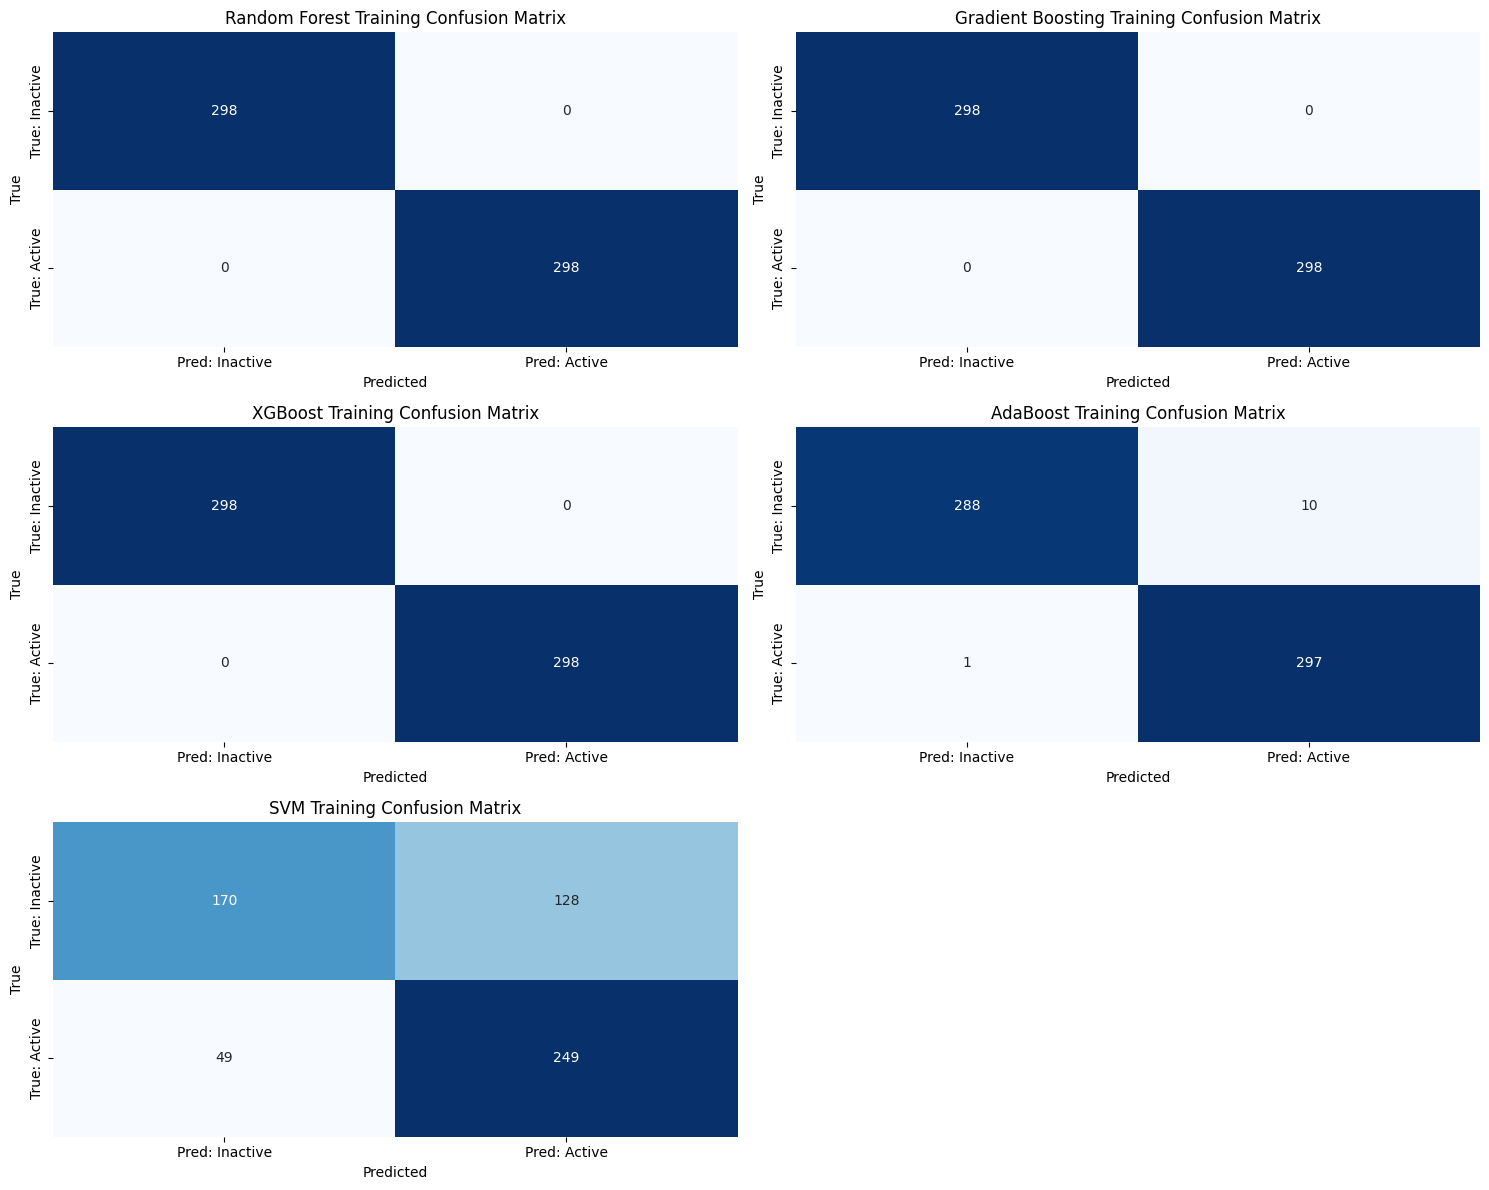

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    confusion_matrix, matthews_corrcoef, recall_score
)

# Load SMOTE-resampled training data
X_train = pd.read_csv('/content/drive/MyDrive/EC/EC smote/X_train_resampled.csv')
y_train = pd.read_csv('/content/drive/MyDrive/EC/EC smote/y_train_resampled.csv').squeeze()

# Drop 'Sequence' if present
if 'Sequence' in X_train.columns:
    X_train = X_train.drop(columns=['Sequence'])

# Define your models (added probability=True to SVM)
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)  # probability=True needed for predict_proba
}

print("Training and evaluating on TRAINING data only (SMOTE resampled):")

plt.figure(figsize=(15, 12))
n_models = len(models)

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)

    # Predict probabilities or fallback to decision_function or predictions
    try:
        y_prob = model.predict_proba(X_train)[:, 1]
    except AttributeError:
        if hasattr(model, 'decision_function'):
            y_prob = model.decision_function(X_train)
        else:
            y_prob = model.predict(X_train)
            print(f"Warning: {name} does not support predict_proba or decision_function; using predictions for scoring.")

    y_pred = model.predict(X_train)

    # Calculate metrics on training data
    roc_auc = roc_auc_score(y_train, y_prob)
    pr_auc = average_precision_score(y_train, y_prob)
    f1 = f1_score(y_train, y_pred)
    cm = confusion_matrix(y_train, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = recall_score(y_train, y_pred)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    mcc = matthews_corrcoef(y_train, y_pred)

    print(f"\n{name} Training Set Metrics:")
    print(f"ROC AUC    : {roc_auc:.4f}")
    print(f"PR AUC     : {pr_auc:.4f}")
    print(f"F1 Score   : {f1:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"MCC        : {mcc:.4f}")

    # Plot confusion matrix
    plt.subplot((n_models + 1) // 2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Inactive', 'Pred: Active'],
                yticklabels=['True: Inactive', 'True: Active'])
    plt.title(f"{name} Training Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()


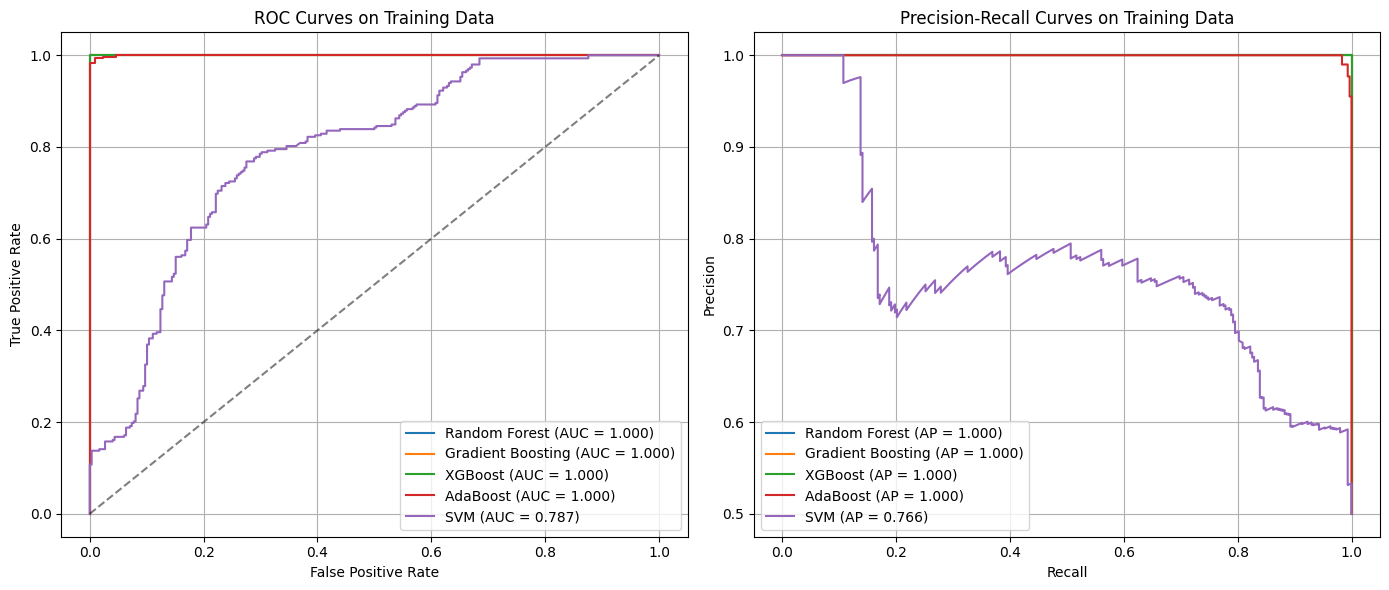

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, average_precision_score

plt.figure(figsize=(14, 6))

colors = plt.get_cmap('tab10').colors

# ROC Curve plot
plt.subplot(1, 2, 1)
for i, (name, model) in enumerate(models.items()):
    try:
        y_scores = model.predict_proba(X_train)[:, 1]
    except AttributeError:
        if hasattr(model, 'decision_function'):
            y_scores = model.decision_function(X_train)
        else:
            y_scores = model.predict(X_train)
    fpr, tpr, _ = roc_curve(y_train, y_scores)
    auc = roc_auc_score(y_train, y_scores)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})", color=colors[i])

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.title("ROC Curves on Training Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)

# Precision-Recall Curve plot
plt.subplot(1, 2, 2)
for i, (name, model) in enumerate(models.items()):
    try:
        y_scores = model.predict_proba(X_train)[:, 1]
    except AttributeError:
        if hasattr(model, 'decision_function'):
            y_scores = model.decision_function(X_train)
        else:
            y_scores = model.predict(X_train)
    precision, recall, _ = precision_recall_curve(y_train, y_scores)
    pr_auc = average_precision_score(y_train, y_scores)
    plt.plot(recall, precision, label=f"{name} (AP = {pr_auc:.3f})", color=colors[i])

plt.title("Precision-Recall Curves on Training Data")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid(True)

plt.tight_layout()
plt.show()


Training and evaluating on TRAINING data only (SMOTE resampled):
Training Random Forest...
Saved Random Forest to /content/drive/MyDrive/EC/EC smote/pre_trained_models/random_forest_smote_model.pkl

Random Forest Training Set Metrics:
ROC AUC    : 1.0000
PR AUC     : 1.0000
F1 Score   : 1.0000
Sensitivity: 1.0000
Specificity: 1.0000
MCC        : 1.0000
Training Gradient Boosting...
Saved Gradient Boosting to /content/drive/MyDrive/EC/EC smote/pre_trained_models/gradient_boosting_smote_model.pkl

Gradient Boosting Training Set Metrics:
ROC AUC    : 1.0000
PR AUC     : 1.0000
F1 Score   : 1.0000
Sensitivity: 1.0000
Specificity: 1.0000
MCC        : 1.0000
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:31:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Saved XGBoost to /content/drive/MyDrive/EC/EC smote/pre_trained_models/xgboost_smote_model.pkl

XGBoost Training Set Metrics:
ROC AUC    : 1.0000
PR AUC     : 1.0000
F1 Score   : 1.0000
Sensitivity: 1.0000
Specificity: 1.0000
MCC        : 1.0000
Training Decision Tree...
Saved Decision Tree to /content/drive/MyDrive/EC/EC smote/pre_trained_models/decision_tree_smote_model.pkl

Decision Tree Training Set Metrics:
ROC AUC    : 1.0000
PR AUC     : 1.0000
F1 Score   : 1.0000
Sensitivity: 1.0000
Specificity: 1.0000
MCC        : 1.0000
Training AdaBoost...
Saved AdaBoost to /content/drive/MyDrive/EC/EC smote/pre_trained_models/adaboost_smote_model.pkl

AdaBoost Training Set Metrics:
ROC AUC    : 0.9997
PR AUC     : 0.9997
F1 Score   : 0.9818
Sensitivity: 0.9966
Specificity: 0.9664
MCC        : 0.9635


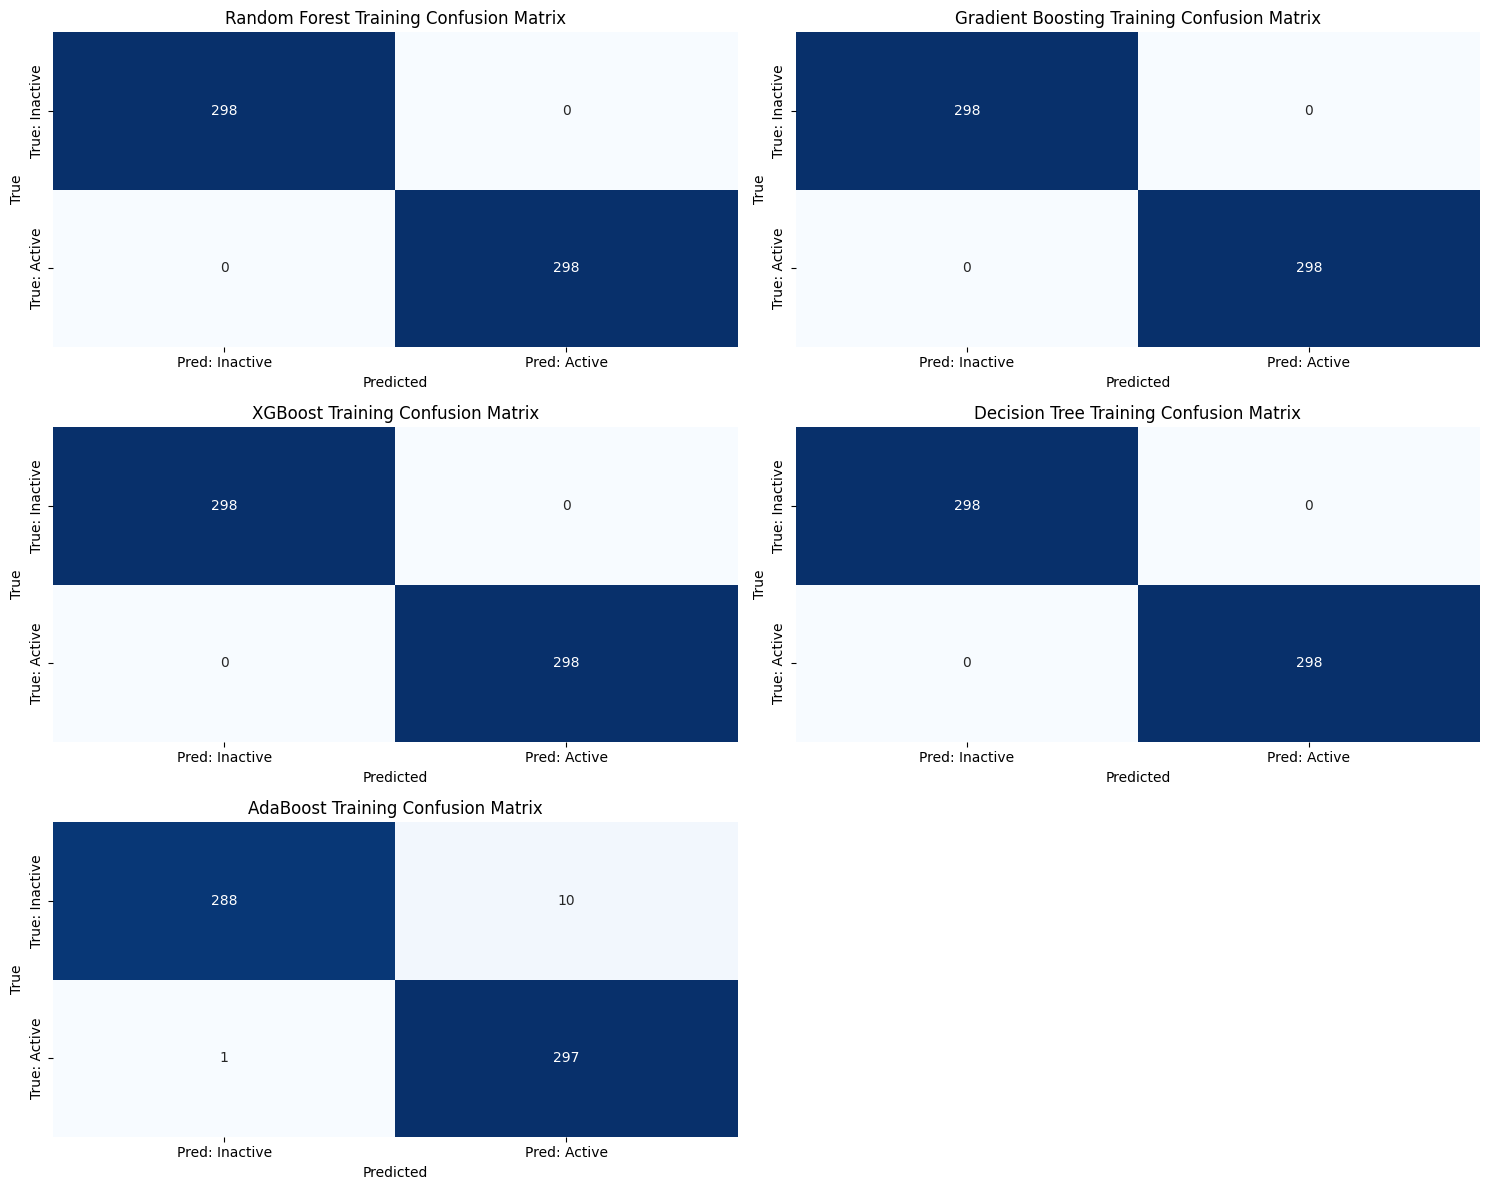


--- Evaluating on Test Data ---

Loading model: Random Forest
Random Forest Test Metrics:
ROC AUC    : 0.9851
PR AUC     : 0.9553
F1 Score   : 0.8500
Sensitivity: 0.8095
Specificity: 0.9733
MCC        : 0.8123

Loading model: Gradient Boosting
Gradient Boosting Test Metrics:
ROC AUC    : 0.9784
PR AUC     : 0.9336
F1 Score   : 0.8293
Sensitivity: 0.8095
Specificity: 0.9600
MCC        : 0.7833

Loading model: Xgboost
Xgboost Test Metrics:
ROC AUC    : 0.9822
PR AUC     : 0.9357
F1 Score   : 0.8500
Sensitivity: 0.8095
Specificity: 0.9733
MCC        : 0.8123

Loading model: Decision Tree
Decision Tree Test Metrics:
ROC AUC    : 0.8648
PR AUC     : 0.6400
F1 Score   : 0.7727
Sensitivity: 0.8095
Specificity: 0.9200
MCC        : 0.7066

Loading model: Adaboost
Adaboost Test Metrics:
ROC AUC    : 0.9829
PR AUC     : 0.9372
F1 Score   : 0.8837
Sensitivity: 0.9048
Specificity: 0.9600
MCC        : 0.8506


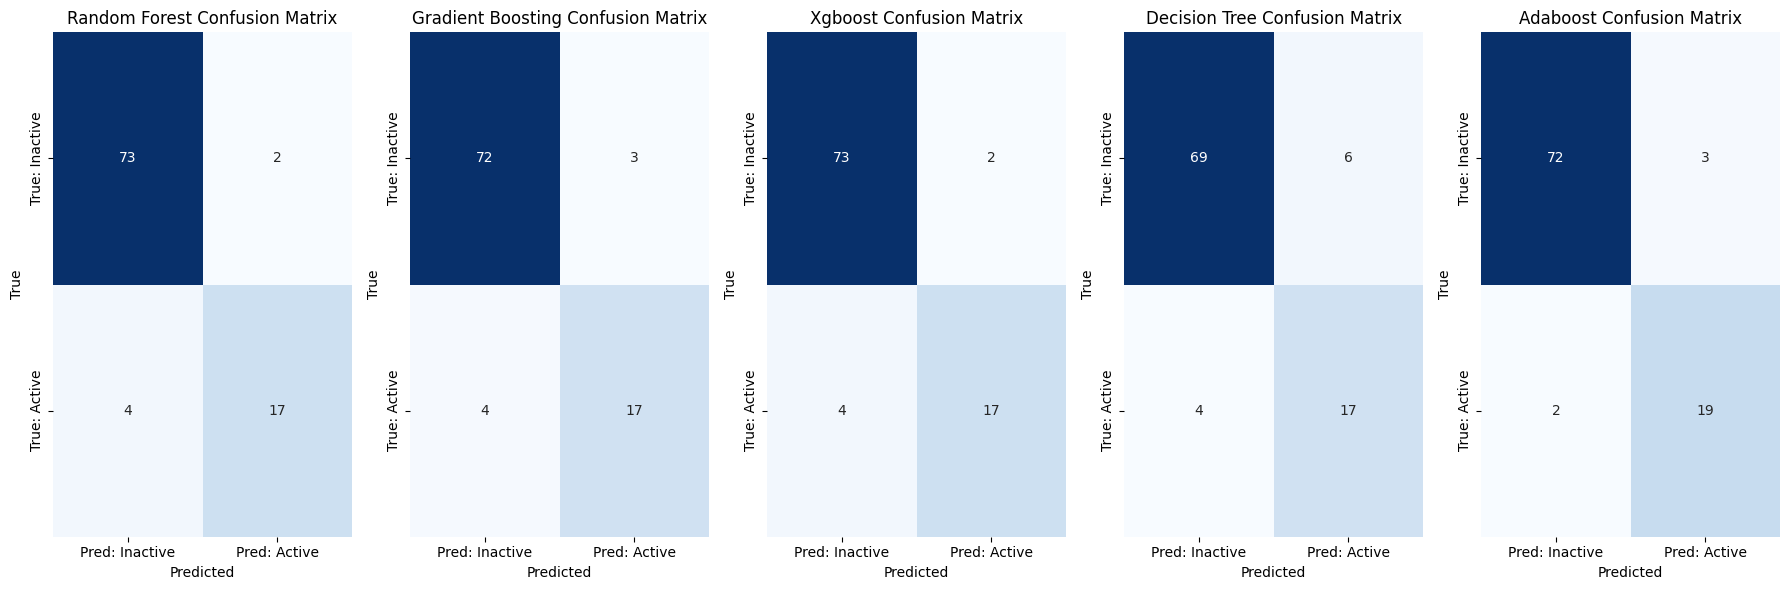

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    confusion_matrix, matthews_corrcoef, recall_score
)
import joblib # Import joblib to save models

# Load SMOTE-resampled training data
X_train = pd.read_csv('/content/drive/MyDrive/EC/EC smote/X_train_resampled.csv')
y_train = pd.read_csv('/content/drive/MyDrive/EC/EC smote/y_train_resampled.csv').squeeze()

# Drop 'Sequence' if present
if 'Sequence' in X_train.columns:
    X_train = X_train.drop(columns=['Sequence'])

# Define your models (default params or tweak if you want)
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Directory to save the newly trained models
save_dir = '/content/drive/MyDrive/EC/EC smote/pre_trained_models/'
# Create the directory if it doesn't exist
!mkdir -p "$save_dir"

print("Training and evaluating on TRAINING data only (SMOTE resampled):")

plt.figure(figsize=(15, 12))
n_models = len(models)
saved_model_paths = [] # List to store paths of saved models

for i, (name, model) in enumerate(models.items(), 1):
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    # Save the trained model
    model_filename = f"{name.replace(' ', '_').lower()}_smote_model.pkl"
    model_save_path = save_dir + model_filename
    joblib.dump(model, model_save_path)
    saved_model_paths.append(model_save_path)
    print(f"Saved {name} to {model_save_path}")


    # Predict probabilities or fallback to decision_function or predictions
    try:
        y_prob = model.predict_proba(X_train)[:, 1]
    except AttributeError:
        if hasattr(model, 'decision_function'):
            y_prob = model.decision_function(X_train)
        else:
            y_prob = model.predict(X_train)
            print(f"Warning: {name} does not support predict_proba or decision_function; using predictions for scoring.")

    y_pred = model.predict(X_train)

    # Calculate metrics on training data
    roc_auc = roc_auc_score(y_train, y_prob)
    pr_auc = average_precision_score(y_train, y_prob)
    f1 = f1_score(y_train, y_pred)
    cm = confusion_matrix(y_train, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = recall_score(y_train, y_pred)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    mcc = matthews_corrcoef(y_train, y_pred)

    print(f"\n{name} Training Set Metrics:")
    print(f"ROC AUC    : {roc_auc:.4f}")
    print(f"PR AUC     : {pr_auc:.4f}")
    print(f"F1 Score   : {f1:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"MCC        : {mcc:.4f}")

    # Plot confusion matrix
    plt.subplot((n_models + 1) // 2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Inactive', 'Pred: Active'],
                yticklabels=['True: Inactive', 'True: Active'])
    plt.title(f"{name} Training Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()

print("\n--- Evaluating on Test Data ---")
# Update the model_paths to use the newly saved models
model_paths = saved_model_paths

# Load test data
X_test = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/X_test_features.csv')
y_test = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/y_test.csv').squeeze()

# Drop 'Sequence' column if present
if 'Sequence' in X_test.columns:
    X_test = X_test.drop(columns=['Sequence'])

results = []

for model_path in model_paths:
    # Extract model name from the new file name format
    model_name = model_path.split('/')[-1].replace('_smote_model.pkl', '').replace('_', ' ').title()
    print(f"\nLoading model: {model_name}")
    # Load the model using joblib
    model = joblib.load(model_path)

    # Now evaluate on test data (rest of the code remains the same)
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        if hasattr(model, 'decision_function'):
            y_prob = model.decision_function(X_test)
        else:
            y_prob = model.predict(X_test)
            print(f"Warning: {model_name} does not support probabilities; using predictions for metrics.")

    y_pred = model.predict(X_test)

    roc_auc = roc_auc_score(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = recall_score(y_test, y_pred)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    mcc = matthews_corrcoef(y_test, y_pred)

    print(f"{model_name} Test Metrics:")
    print(f"ROC AUC    : {roc_auc:.4f}")
    print(f"PR AUC     : {pr_auc:.4f}")
    print(f"F1 Score   : {f1:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"MCC        : {mcc:.4f}")

    results.append({
        'Model': model_name,
        'ROC_AUC': roc_auc,
        'PR_AUC': pr_auc,
        'F1_Score': f1,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'MCC': mcc,
        'Confusion_Matrix': cm
    })

# Plot confusion matrices side-by-side
plt.figure(figsize=(18, 6))
for i, result in enumerate(results, 1):
    plt.subplot(1, len(results), i)
    sns.heatmap(result['Confusion_Matrix'], annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Inactive', 'Pred: Active'],
                yticklabels=['True: Inactive', 'True: Active'])
    plt.title(f"{result['Model']} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()


Training Random Forest...
Saved Random Forest model to /content/drive/MyDrive/EC/EC smote/pre_trained_models/random_forest_smote_model.pkl

Training Gradient Boosting...
Saved Gradient Boosting model to /content/drive/MyDrive/EC/EC smote/pre_trained_models/gradient_boosting_smote_model.pkl

Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:42:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Saved XGBoost model to /content/drive/MyDrive/EC/EC smote/pre_trained_models/xgboost_smote_model.pkl

Training Decision Tree...
Saved Decision Tree model to /content/drive/MyDrive/EC/EC smote/pre_trained_models/decision_tree_smote_model.pkl

Training AdaBoost...
Saved AdaBoost model to /content/drive/MyDrive/EC/EC smote/pre_trained_models/adaboost_smote_model.pkl

Evaluating Random Forest on test data...

Random Forest Test Metrics:
ROC AUC    : 0.9851
PR AUC     : 0.9553
F1 Score   : 0.8500
Sensitivity: 0.8095
Specificity: 0.9733
MCC        : 0.8123


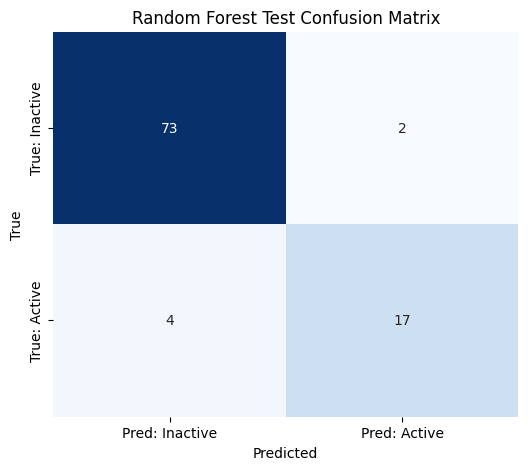

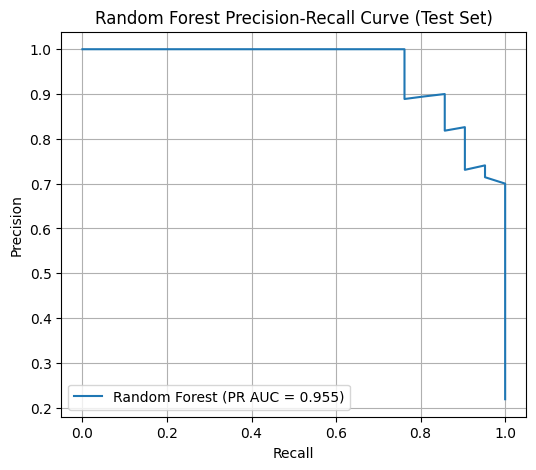


Evaluating Gradient Boosting on test data...

Gradient Boosting Test Metrics:
ROC AUC    : 0.9784
PR AUC     : 0.9336
F1 Score   : 0.8293
Sensitivity: 0.8095
Specificity: 0.9600
MCC        : 0.7833


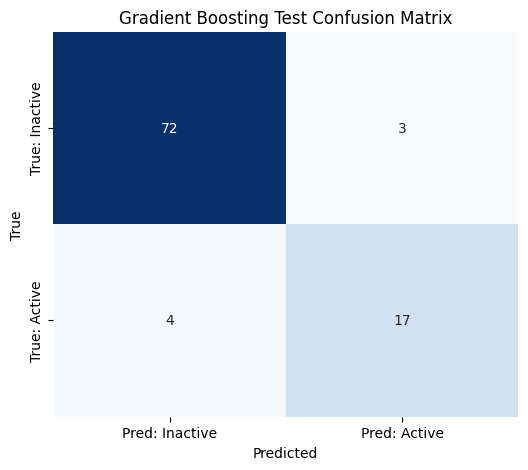

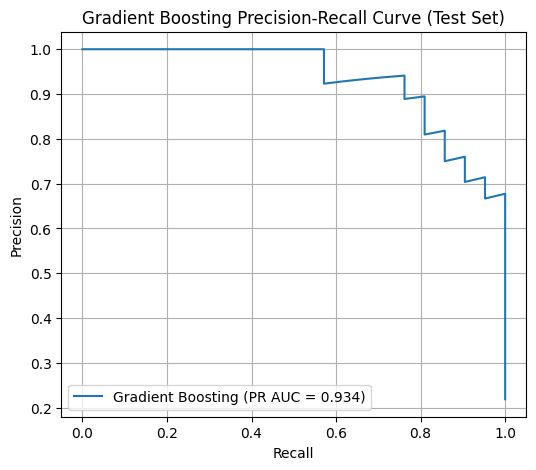


Evaluating XGBoost on test data...

XGBoost Test Metrics:
ROC AUC    : 0.9822
PR AUC     : 0.9357
F1 Score   : 0.8500
Sensitivity: 0.8095
Specificity: 0.9733
MCC        : 0.8123


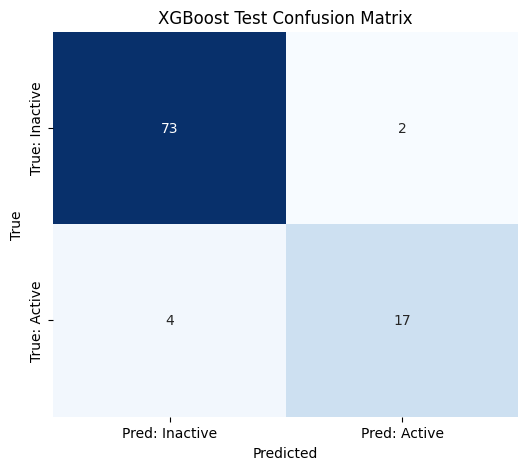

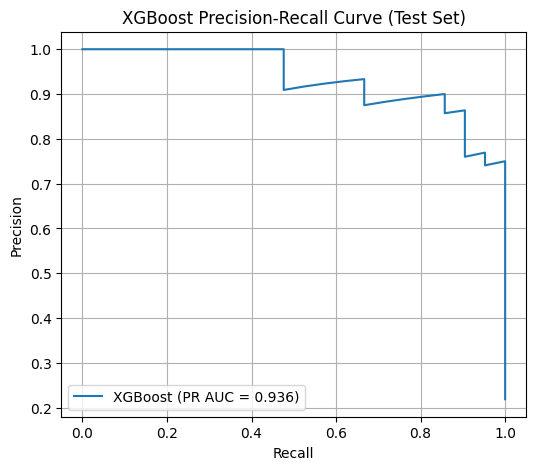


Evaluating Decision Tree on test data...

Decision Tree Test Metrics:
ROC AUC    : 0.8648
PR AUC     : 0.6400
F1 Score   : 0.7727
Sensitivity: 0.8095
Specificity: 0.9200
MCC        : 0.7066


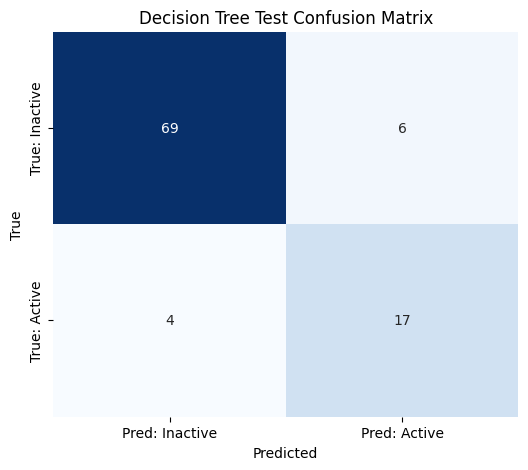

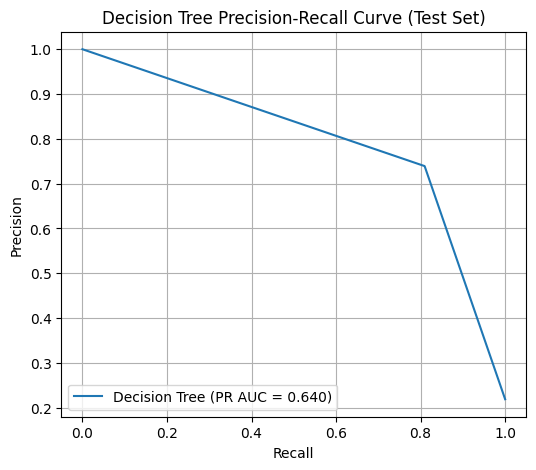


Evaluating AdaBoost on test data...

AdaBoost Test Metrics:
ROC AUC    : 0.9829
PR AUC     : 0.9372
F1 Score   : 0.8837
Sensitivity: 0.9048
Specificity: 0.9600
MCC        : 0.8506


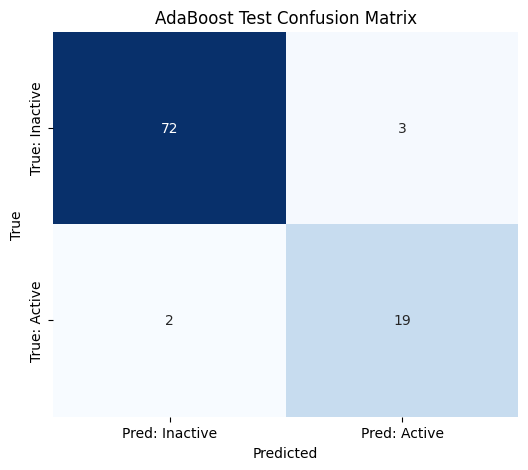

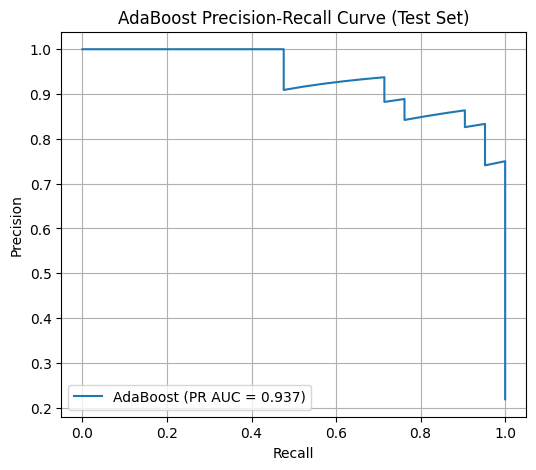

In [15]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    confusion_matrix, matthews_corrcoef, recall_score,
    precision_recall_curve
)

# Load SMOTE-resampled training data
X_train = pd.read_csv('/content/drive/MyDrive/EC/EC smote/X_train_resampled.csv')
y_train = pd.read_csv('/content/drive/MyDrive/EC/EC smote/y_train_resampled.csv').squeeze()

# Drop 'Sequence' if present
if 'Sequence' in X_train.columns:
    X_train = X_train.drop(columns=['Sequence'])

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Directory to save models
save_dir = '/content/drive/MyDrive/EC/EC smote/pre_trained_models/'
os.makedirs(save_dir, exist_ok=True)

def calculate_metrics(model, X, y, dataset_name, model_name):
    try:
        y_prob = model.predict_proba(X)[:, 1]
    except AttributeError:
        if hasattr(model, 'decision_function'):
            y_prob = model.decision_function(X)
        else:
            y_prob = model.predict(X)
            print(f"Warning: {model_name} does not support probabilities; using predictions for metrics.")

    y_pred = model.predict(X)

    roc_auc = roc_auc_score(y, y_prob)
    pr_auc = average_precision_score(y, y_prob)
    f1 = f1_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = recall_score(y, y_pred)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    mcc = matthews_corrcoef(y, y_pred)

    print(f"\n{model_name} {dataset_name} Metrics:")
    print(f"ROC AUC    : {roc_auc:.4f}")
    print(f"PR AUC     : {pr_auc:.4f}")
    print(f"F1 Score   : {f1:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"MCC        : {mcc:.4f}")

    return cm, y_prob, pr_auc

# Train and save models
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    model_path = os.path.join(save_dir, f"{name.replace(' ', '_').lower()}_smote_model.pkl")
    joblib.dump(model, model_path)
    print(f"Saved {name} model to {model_path}")

# Load test data
X_test = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/X_test_features.csv')
y_test = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/y_test.csv').squeeze()
if 'Sequence' in X_test.columns:
    X_test = X_test.drop(columns=['Sequence'])

# Evaluate and plot per model, one by one
for name, model in models.items():
    print(f"\nEvaluating {name} on test data...")

    cm_test, y_prob_test, pr_auc_test = calculate_metrics(model, X_test, y_test, "Test", name)

    # Plot confusion matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Inactive', 'Pred: Active'],
                yticklabels=['True: Inactive', 'True: Active'])
    plt.title(f"{name} Test Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Plot Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob_test)
    plt.figure(figsize=(6,5))
    plt.plot(recall, precision, label=f'{name} (PR AUC = {pr_auc_test:.3f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{name} Precision-Recall Curve (Test Set)')
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()


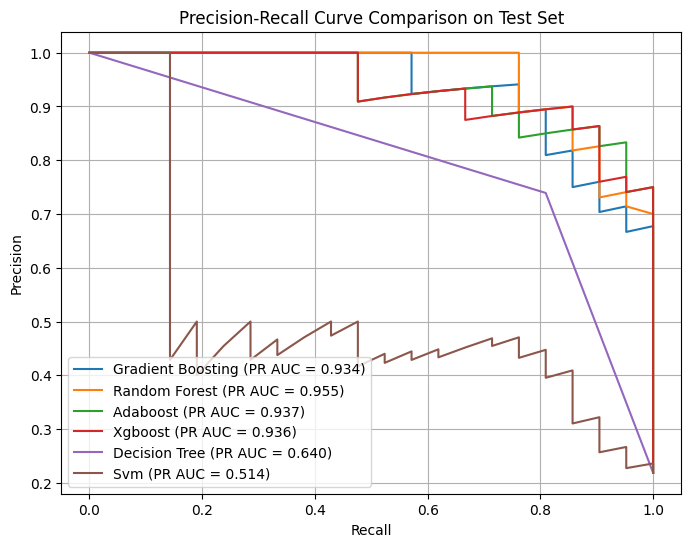

In [17]:
import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load test data
X_test = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/X_test_features.csv')
y_test = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/y_test.csv').squeeze()

if 'Sequence' in X_test.columns:
    X_test = X_test.drop(columns=['Sequence'])

# Directory with saved models
save_dir = '/content/drive/MyDrive/EC/EC smote/pre_trained_models/'

# List model filenames in the directory (make sure only relevant model files are present)
model_files = [f for f in os.listdir(save_dir) if f.endswith('_smote_model.pkl')]

plt.figure(figsize=(8, 6))

for model_file in model_files:
    model_name = model_file.replace('_smote_model.pkl', '').replace('_', ' ').title()
    model_path = os.path.join(save_dir, model_file)
    model = joblib.load(model_path)

    # Get prediction probabilities for positive class (class 1)
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        # For SVM or others without predict_proba
        if hasattr(model, 'decision_function'):
            y_prob = model.decision_function(X_test)
        else:
            y_prob = model.predict(X_test)
            print(f"Warning: {model_name} does not support predict_proba or decision_function.")

    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)

    plt.plot(recall, precision, label=f'{model_name} (PR AUC = {pr_auc:.3f})')

plt.title('Precision-Recall Curve Comparison on Test Set')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()



Feature Importance for Random Forest:


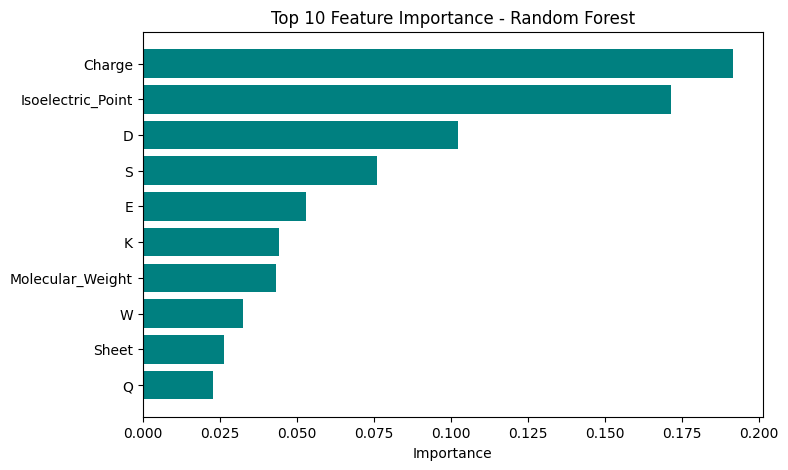


Feature Importance for Gradient Boosting:


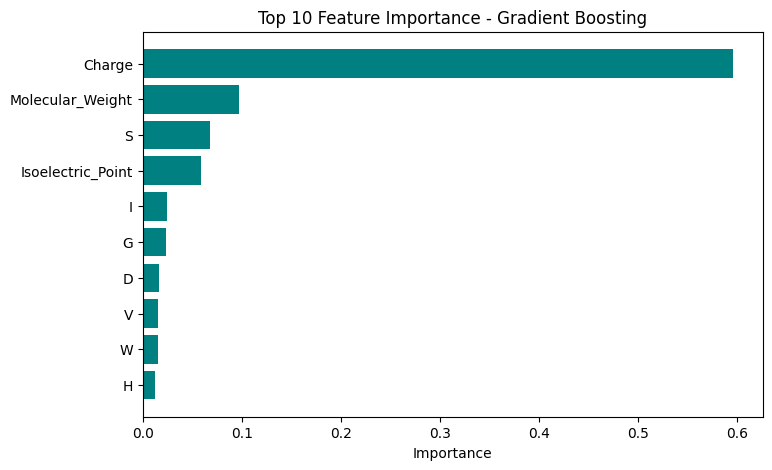


Feature Importance for XGBoost:


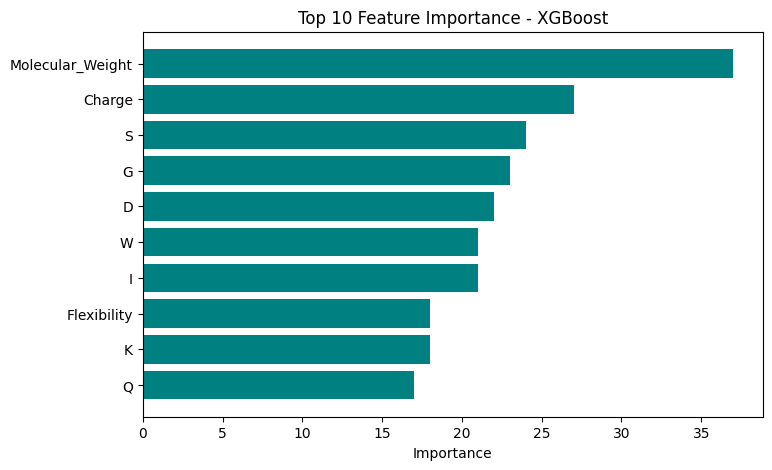


Feature Importance for AdaBoost:


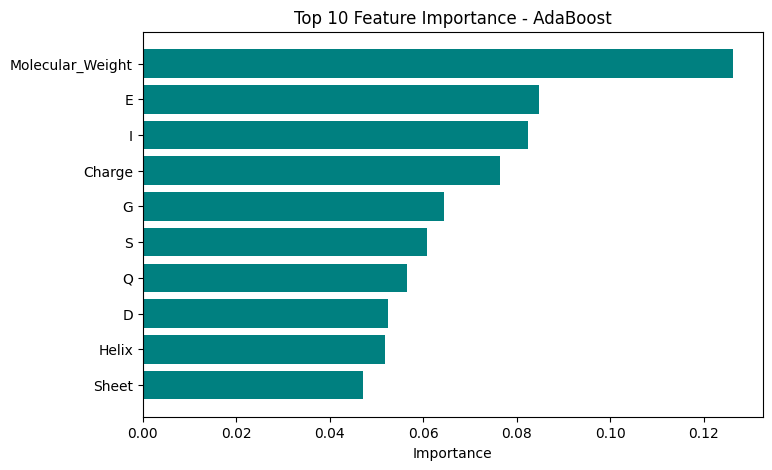

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load test data features names
feature_names = X_train.columns.tolist()

# Models to analyze
tree_models = {
    'Random Forest': '/content/drive/MyDrive/EC/EC smote/pre_trained_models/random_forest_smote_model.pkl',
    'Gradient Boosting': '/content/drive/MyDrive/EC/EC smote/pre_trained_models/gradient_boosting_smote_model.pkl',
    'XGBoost': '/content/drive/MyDrive/EC/EC smote/pre_trained_models/xgboost_smote_model.pkl',
    'AdaBoost': '/content/drive/MyDrive/EC/EC smote/pre_trained_models/adaboost_smote_model.pkl'
}

for name, path in tree_models.items():
    model = joblib.load(path)
    print(f"\nFeature Importance for {name}:")

    # XGBoost uses get_booster().get_score()
    if name == 'XGBoost':
        booster = model.get_booster()
        fmap = {f'f{i}': feature_names[i] for i in range(len(feature_names))}
        imp = booster.get_score(importance_type='weight')
        # Convert to DataFrame
        imp_df = pd.DataFrame({
            'Feature': [fmap.get(k, k) for k in imp.keys()],
            'Importance': list(imp.values())
        })
        imp_df = imp_df.sort_values(by='Importance', ascending=False)
    else:
        imp = model.feature_importances_
        imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': imp})
        imp_df = imp_df.sort_values(by='Importance', ascending=False)

    # Plot top 10 important features
    imp_df_top = imp_df.head(10)
    plt.figure(figsize=(8, 5))
    plt.barh(imp_df_top['Feature'][::-1], imp_df_top['Importance'][::-1], color='teal')
    plt.xlabel('Importance')
    plt.title(f'Top 10 Feature Importance - {name}')
    plt.show()


In [12]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=756a98e408c2ee680d7b22aa7c888cf4061d227ebdd26b977da0b7711bfec3af
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [20]:
import lime
import lime.lime_tabular
import joblib
import numpy as np
import pandas as pd

# Load your Random Forest model (or any model you want to explain)
rf_model = joblib.load('/content/drive/MyDrive/EC/EC smote/pre_trained_models/random_forest_smote_model.pkl')

# Load test data features and labels
X_test = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/X_test_features.csv')
y_test = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/y_test.csv').squeeze()

# Drop 'Sequence' column if exists
if 'Sequence' in X_test.columns:
    X_test = X_test.drop(columns=['Sequence'])

feature_names = X_test.columns.tolist()
class_names = ['Inactive', 'Active']

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=feature_names,
    class_names=class_names,
    mode='classification'
)

# Select indices for 2 samples of class 0 and 2 of class 1
idx_class0 = [i for i, val in enumerate(y_test) if val == 0][:2]
idx_class1 = [i for i, val in enumerate(y_test) if val == 1][:2]
sample_indices = idx_class0 + idx_class1

for idx in sample_indices:
    print(f"\nExplaining prediction for test sample index {idx} (True class: {class_names[y_test.iloc[idx]]})")

    # Explain instance
    exp = explainer.explain_instance(
        data_row=X_test.iloc[idx],
        predict_fn=rf_model.predict_proba,
        num_features=10  # Number of features to show in explanation
    )

    # Show explanation as list
    for feature, weight in exp.as_list():
        print(f"{feature}: {weight:.4f}")

    # Optional: visualize explanation (opens in notebook or saves)
    exp.show_in_notebook(show_table=True)



Explaining prediction for test sample index 1 (True class: Inactive)
D > 4.17: -0.0891
1.00 < Charge <= 4.00: -0.0867
Molecular_Weight > 3715.95: -0.0454
7.78 < Isoelectric_Point <= 9.73: -0.0382
Q > 5.13: -0.0324
K <= 3.84: -0.0311
0.00 < W <= 4.00: 0.0250
1.14 < E <= 5.41: 0.0218
Y > 3.63: -0.0189
Length > 34.00: -0.0183


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.


Explaining prediction for test sample index 2 (True class: Inactive)


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

Charge <= 1.00: -0.1897
Isoelectric_Point <= 7.78: -0.0928
D > 4.17: -0.0843
E > 5.41: -0.0838
S <= 0.00: 0.0506
W <= 0.00: -0.0456
K <= 3.84: -0.0338
2026.51 < Molecular_Weight <= 2662.81: 0.0328
Q <= 0.00: 0.0307
I <= 0.00: -0.0279



Explaining prediction for test sample index 0 (True class: Active)


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

4.00 < Charge <= 6.00: 0.1589
K > 19.23: 0.0778
D <= 0.00: 0.0742
9.73 < Isoelectric_Point <= 10.77: 0.0555
E <= 0.00: 0.0495
Q <= 0.00: 0.0323
2662.81 < Molecular_Weight <= 3715.95: 0.0201
0.00 < W <= 4.00: 0.0192
5.56 < I <= 9.09: 0.0162
23.00 < Length <= 34.00: -0.0153


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:427: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.


Explaining prediction for test sample index 7 (True class: Active)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:427: FutureWarning: Series._

Charge > 6.00: 0.1566
D <= 0.00: 0.0828
Isoelectric_Point > 10.77: 0.0789
K > 19.23: 0.0775
E <= 0.00: 0.0447
W > 4.00: 0.0439
S <= 0.00: 0.0429
2026.51 < Molecular_Weight <= 2662.81: 0.0396
I > 9.09: 0.0360
Q > 5.13: -0.0255



Explaining prediction for test sample index 1 (True class: Inactive)


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

D > 4.17: -0.0920
1.00 < Charge <= 4.00: -0.0858
Molecular_Weight > 3715.95: -0.0441
7.78 < Isoelectric_Point <= 9.73: -0.0389
K <= 3.84: -0.0348
Q > 5.13: -0.0340
0.00 < W <= 4.00: 0.0258
Sheet > 3.00: -0.0217
Length > 34.00: -0.0173
1.14 < E <= 5.41: 0.0132


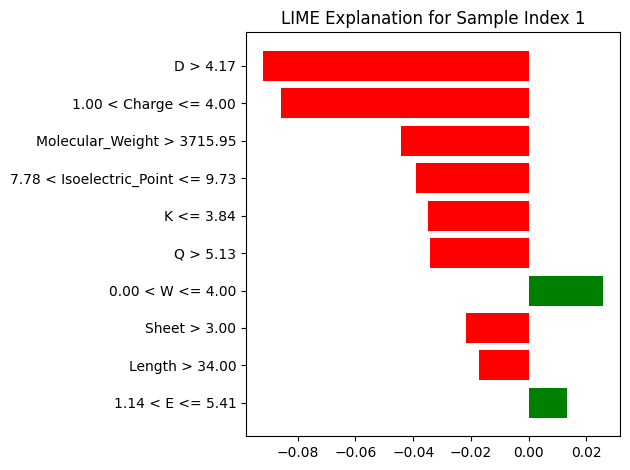


Explaining prediction for test sample index 2 (True class: Inactive)


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

Charge <= 1.00: -0.1882
Isoelectric_Point <= 7.78: -0.0979
E > 5.41: -0.0926
D > 4.17: -0.0843
W <= 0.00: -0.0529
S <= 0.00: 0.0507
K <= 3.84: -0.0358
I <= 0.00: -0.0278
Q <= 0.00: 0.0275
2026.51 < Molecular_Weight <= 2662.81: 0.0196


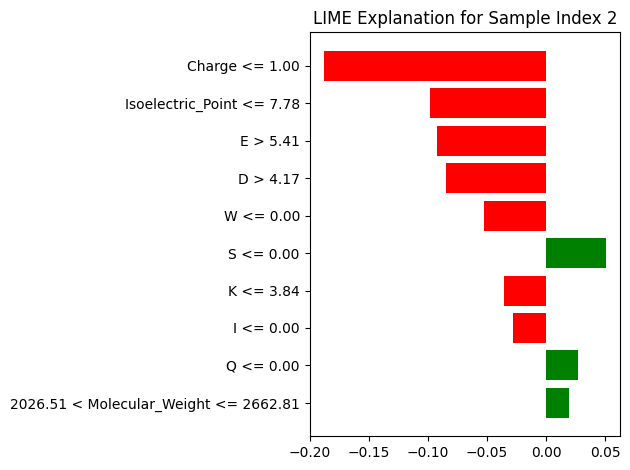


Explaining prediction for test sample index 0 (True class: Active)


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

4.00 < Charge <= 6.00: 0.1691
K > 19.23: 0.0855
D <= 0.00: 0.0849
9.73 < Isoelectric_Point <= 10.77: 0.0686
E <= 0.00: 0.0512
Q <= 0.00: 0.0265
0.00 < W <= 4.00: 0.0189
2662.81 < Molecular_Weight <= 3715.95: 0.0160
0.40 < Flexibility <= 0.46: 0.0158
Y <= 0.00: 0.0095


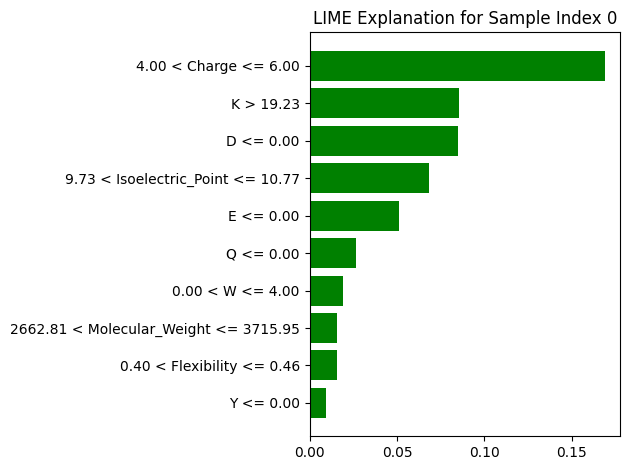


Explaining prediction for test sample index 7 (True class: Active)


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

Charge > 6.00: 0.1531
D <= 0.00: 0.0804
K > 19.23: 0.0770
Isoelectric_Point > 10.77: 0.0729
S <= 0.00: 0.0556
E <= 0.00: 0.0440
W > 4.00: 0.0417
I > 9.09: 0.0376
Q > 5.13: -0.0317
2026.51 < Molecular_Weight <= 2662.81: 0.0299


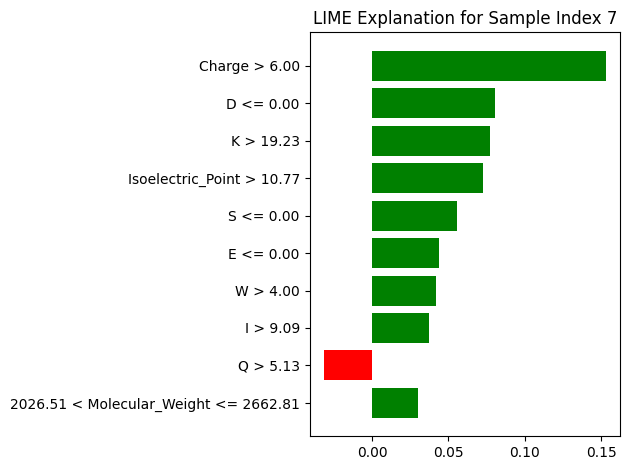

In [21]:
import lime
import lime.lime_tabular
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your Random Forest model (or any model you want to explain)
rf_model = joblib.load('/content/drive/MyDrive/EC/EC smote/pre_trained_models/random_forest_smote_model.pkl')

# Load test data features and labels
X_test = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/X_test_features.csv')
y_test = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/y_test.csv').squeeze()

# Drop 'Sequence' column if exists
if 'Sequence' in X_test.columns:
    X_test = X_test.drop(columns=['Sequence'])

feature_names = X_test.columns.tolist()
class_names = ['Inactive', 'Active']

# Assuming X_train is already loaded and numeric, needed for explainer
# If not, load X_train similarly to X_test with 'Sequence' dropped
# For example:
# X_train = pd.read_csv('/content/drive/MyDrive/EC/EC smote/X_train_resampled.csv')
# if 'Sequence' in X_train.columns:
#     X_train = X_train.drop(columns=['Sequence'])

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),  # Use numeric training data here
    feature_names=feature_names,
    class_names=class_names,
    mode='classification'
)

# Select indices for 2 samples of class 0 and 2 of class 1
idx_class0 = [i for i, val in enumerate(y_test) if val == 0][:2]
idx_class1 = [i for i, val in enumerate(y_test) if val == 1][:2]
sample_indices = idx_class0 + idx_class1

for idx in sample_indices:
    print(f"\nExplaining prediction for test sample index {idx} (True class: {class_names[y_test.iloc[idx]]})")

    # Explain instance
    exp = explainer.explain_instance(
        data_row=X_test.iloc[idx],
        predict_fn=rf_model.predict_proba,
        num_features=10  # Number of features to show in explanation
    )

    # Show explanation as list
    for feature, weight in exp.as_list():
        print(f"{feature}: {weight:.4f}")

    # Plot explanation inline
    fig = exp.as_pyplot_figure()
    plt.title(f"LIME Explanation for Sample Index {idx}")
    plt.tight_layout()
    plt.show()
